<a href="https://colab.research.google.com/github/shivkumarganesh/Talks_and_Presentation/blob/main/Brain%20Community/Convolutional_Neural_Network_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick CNN Refresher

## What is CNN
1. A class of Neural Network
2. Specializes in processing Grid Like Topology eg Images
3. Its capable of Processing Images as images are made up of pixel which is nothing but data points

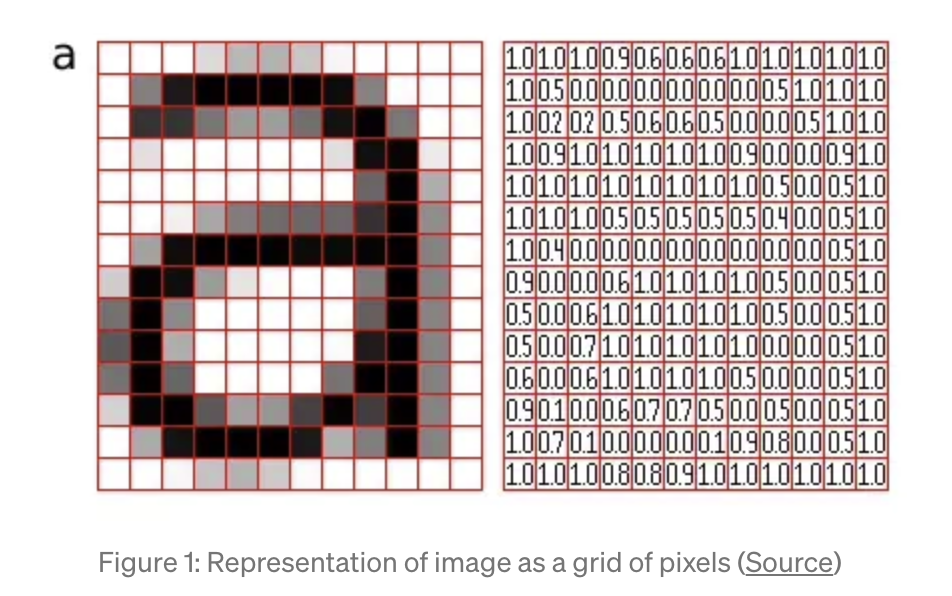

## Convolutional Neural Network Architecture

CNN typically is made up of three layers
1. Convolutional Layer
2. Pooling Layer
3. Fully Connected Layer
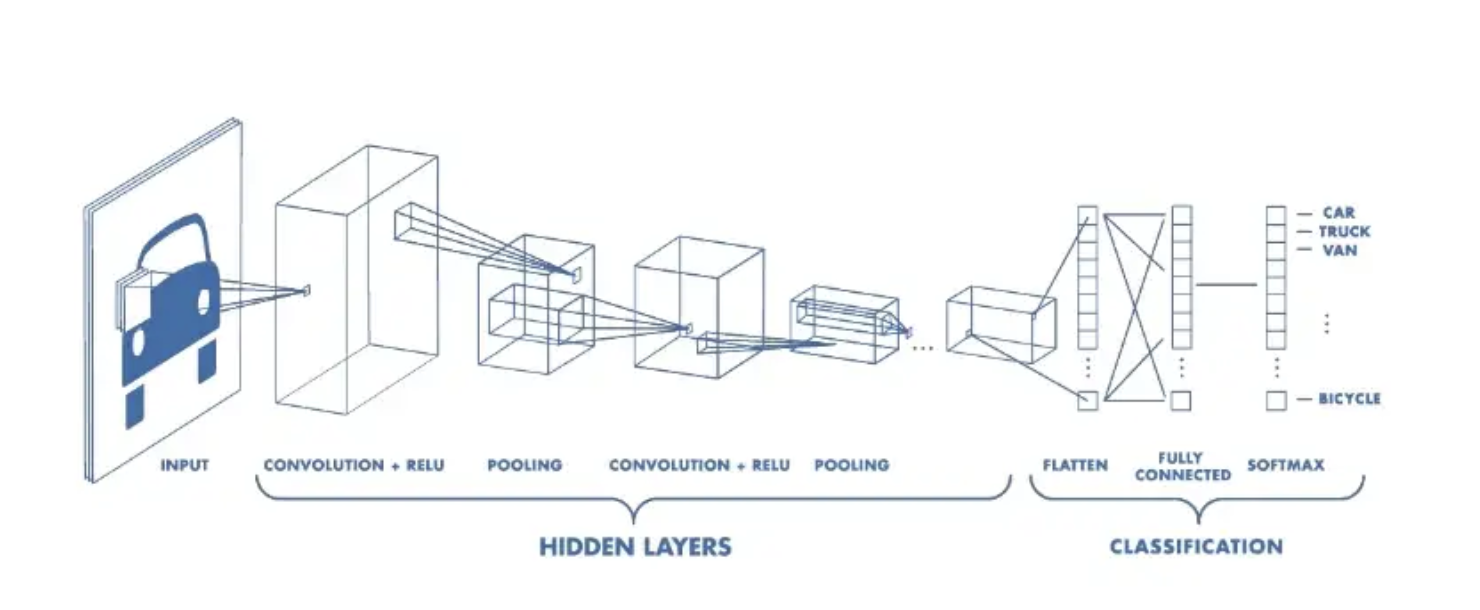

## Lets look at these Layers Separately

### Convolutional Layer
1. Core Building Block of CNN
2. Performs dot product between two matrices where one is called a kernel which has set of learnable parameters
3. The second matrix is restricted portion of the receptive field

### Pooling Layer 
A Pooling layer is added after the Convolutional layer(s), as seen in the structure of a CNN above. It downsamples the output of the Convolutional layers by sliding the filter of some size with some stride size and calculating the maximum or average of the input.

In [1]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/780/1*Eai425FYQQSNOaahTXqtgg.gif')

Useful Links

1. [Image Kernels](https://setosa.io/ev/image-kernels/)
2. [Types of Convolution Kernels : Simplified](htthttps://towardsdatascience.com/types-of-convolution-kernels-simplified-f040cb307c37ps://)


# Topics to be covered

We will be covering the below mentioned topics using Tensorflow

- Gathering data to work with
- Architecture of a convolutional neural network
- Base Case for CNN
- Steps in modelling for binary image classification with CNNs
  - Data Visualization
  - Data Preprocessing and Preparation
  - Generating Baseline CNN Model
  - Fitting the model on our training data
  - Model Evaluation
  - Improvement in the model by utilizing various techniques
  - Prediction from our generated model
- Setting up our model for Multiclass Classification
 - Using Data having Multiple Labels to get started with
 - Follow the same steps as above.

**Kernel**
Before we dive into it, I just want to make the distinction between the terms ‘kernel’ and ‘filter’ very clear because I have seen a lot of people use them interchangeably. A kernel is, as described earlier, a matrix of weights which are multiplied with the input to extract relevant features. The dimensions of the kernel matrix is how the convolution gets it’s name. For example, in 2D convolutions, the kernel matrix is a 2D matrix.

**Filter**
A filter however is a concatenation of multiple kernels, each kernel assigned to a particular channel of the input. Filters are always one dimension more than the kernels. For example, in 2D convolutions, filters are 3D matrices (which is essentially a concatenation of 2D matrices i.e. the kernels). So for a CNN layer with kernel dimensions h*w and input channels k, the filter dimensions are k*h*w.

# Simple Model Building Activity


## Importing the dataset

As we are dealing with CNN we will be using image dataset. As the first part of the talk deals with binary classification, We will be using the dataset with two kind of images namely pizza 🍕and steak 🥩.

The dataset can be downloaded from the link [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/)

> ⚡ Data has already been preprocedded. Though we will be seeing how the folder structure should be so as to let tensorflow injest the data in a proper format.

Lets go ahead and download the data.

In [49]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the folder that contains the pizza or steak images
pizza_steak_zip = zipfile.ZipFile("pizza_steak.zip", "r")
pizza_steak_zip.extractall()
pizza_steak_zip.close()

--2022-12-17 09:00:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.16.128, 142.251.45.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   163MB/s    in 0.6s    

2022-12-17 09:00:19 (163 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspecting the data along with the various other attributes

Inspecting the entire data is a vital first step in every machine learning endeavor. To grasp the data you're dealing with, this often requires a lot of visualization and folder browsing.

The data is already formatted into the file structure we need. This leads to direct usage of the data. I will point out tutorials where you can easily understand how the data should be formatted in order to ge

List of Directories:
* A `train` directory - contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
* A `test` directory - contains all the test images and it comes with usually the same structure as the `train` directory.

```
Example

pizza_steak <- top level
└───train <- training images
│   └───pizza
│   │   │   1007404.jpg
│   │   │   1638827.jpg
│   │   │   ...      
│   └───steak
│       │   1003405.jpg
│       │   1646551.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1004516.jpg
│   │   │   1505419.jpg
│   │   │   ...      
│   └───steak
│       │   1002344.jpg
│       │   1652315.jpg
│       │   ...    
 ```

In [50]:
# Lets check out the folder structure
!ls pizza_steak

test  train


We can see we've got a `train` and `test` folder.

Let's see what's inside one of them.

In [51]:
!ls pizza_steak/train/

pizza  steak


Data within each directory

In [52]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

Lets Walk through the entire data in order to see the number of testing and training example per folder.

In [53]:
import os

# Walk through pizza_steak dataset in order to see the number of examples
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"In Total there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In Total there are 2 directories and 0 images in 'pizza_steak'.
In Total there are 2 directories and 0 images in 'pizza_steak/train'.
In Total there are 0 directories and 750 images in 'pizza_steak/train/pizza'.
In Total there are 0 directories and 750 images in 'pizza_steak/train/steak'.
In Total there are 2 directories and 0 images in 'pizza_steak/test'.
In Total there are 0 directories and 250 images in 'pizza_steak/test/pizza'.
In Total there are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [54]:
# Extracting Class Names from the folders in order to see which binary classes we have in our dataset
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print('The class names that we are working with are',class_names)

The class names that we are working with are ['pizza' 'steak']


Okay, so we've got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

So from the above we can deduce the follwing:-
1. Training images - 750
2. Testing images - 250



Now lets do some data Visualization

In [55]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


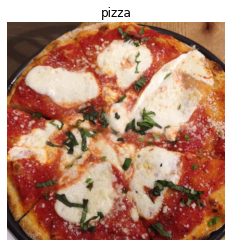

In [56]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

From the above its clear how the images look like. We do notice that the shape of the images are also different at times. 


So now lets do ahead and see how the image tensor looks like.

This is because the way our computer sees the image is in the form of a big array (tensor).

In [57]:
# View the img (actually just a big array/tensor)
img

array([[[ 85,  55,  44],
        [ 87,  57,  46],
        [ 85,  55,  44],
        ...,
        [186, 141, 102],
        [181, 136,  97],
        [161, 115,  79]],

       [[ 80,  50,  39],
        [ 84,  54,  43],
        [ 83,  53,  42],
        ...,
        [185, 140,  99],
        [185, 140, 101],
        [169, 123,  87]],

       [[ 79,  49,  38],
        [ 84,  54,  43],
        [ 85,  55,  44],
        ...,
        [183, 138,  97],
        [188, 143, 104],
        [176, 131,  92]],

       ...,

       [[203, 193, 202],
        [204, 194, 203],
        [204, 194, 205],
        ...,
        [177, 145, 107],
        [174, 141, 106],
        [171, 138, 103]],

       [[203, 193, 202],
        [204, 194, 203],
        [204, 194, 205],
        ...,
        [183, 150, 115],
        [183, 150, 117],
        [181, 151, 117]],

       [[205, 195, 204],
        [204, 194, 203],
        [204, 194, 205],
        ...,
        [181, 148, 113],
        [184, 154, 120],
        [189, 158, 127]]

In [58]:
# Shape of the image
img.shape # returns (width, height, colour channels)

(512, 512, 3)

Look closly at these numbers

Image width - 355
Image height - 512
Color Channels - RGB - 3
Values in image array range from - 0 to 255

Looking at the image shape more closely, you'll see it's in the form `(Width, Height, Colour Channels)`.


> ⚡ **Note:** Numerous machine learning methods, including neural networks, enjoy working with numbers between 0 and 1, as we've already mentioned. Given this, one of the most popular preparation techniques for working with pictures is to divide the image arrays by 255 to **scale** (also known as **normalize**) their pixel values..

In [59]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.33333333, 0.21568627, 0.17254902],
        [0.34117647, 0.22352941, 0.18039216],
        [0.33333333, 0.21568627, 0.17254902],
        ...,
        [0.72941176, 0.55294118, 0.4       ],
        [0.70980392, 0.53333333, 0.38039216],
        [0.63137255, 0.45098039, 0.30980392]],

       [[0.31372549, 0.19607843, 0.15294118],
        [0.32941176, 0.21176471, 0.16862745],
        [0.3254902 , 0.20784314, 0.16470588],
        ...,
        [0.7254902 , 0.54901961, 0.38823529],
        [0.7254902 , 0.54901961, 0.39607843],
        [0.6627451 , 0.48235294, 0.34117647]],

       [[0.30980392, 0.19215686, 0.14901961],
        [0.32941176, 0.21176471, 0.16862745],
        [0.33333333, 0.21568627, 0.17254902],
        ...,
        [0.71764706, 0.54117647, 0.38039216],
        [0.7372549 , 0.56078431, 0.40784314],
        [0.69019608, 0.51372549, 0.36078431]],

       ...,

       [[0.79607843, 0.75686275, 0.79215686],
        [0.8       , 0.76078431, 0.79607843],
        [0.8       , 0

## Architecture of a convolutional neural network

Convolutional neural networks may be built in several different ways, much like other deep learning neural network types. The items you can see below are some of the things you may anticipate seeing on a standard CNN. [Ref image & text](https://github.com/mrdbourke)


Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

## An end-to-end example

Below we will start with the baseline model. We will try to replicate the TinyVGG model that is available in the [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/).

> 📖 **Resource:** The architecture we're using below is a scaled-down version of [VGG-16](https://arxiv.org/abs/1505.06798), a convolutional neural network which came 2nd in the 2014 [ImageNet classification competition](http://image-net.org/).

In [60]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data and Normalizing it form 0-255
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the tdirectories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 206ms/step - loss: 0.5664 - accuracy: 0.7020 - val_loss: 0.4398 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4374 - accuracy: 0.8047 - val_loss: 0.3300 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3910 - accuracy: 0.8240 - val_loss: 0.3690 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3428 - accuracy: 0.8593 - val_loss: 0.3031 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3265 - accuracy: 0.8653 - val_loss: 0.3194 - val_accuracy: 0.8680


Lets take a look at the results and the model summary.

**After 5 Epochs the results are as follows:-**
1. loss = 0.2938
2. accuracy = 0.8787
3. validation loss = 0.3509
4. validation accuracy = 0.8360

We can see our model is performing well on two types of data with binary classification in place. We can still try to inspect the model and try to check how we can further improve this.

In [61]:
# Check out the layers in our model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

Lets generate a model plot. It's easier to see and share as image.

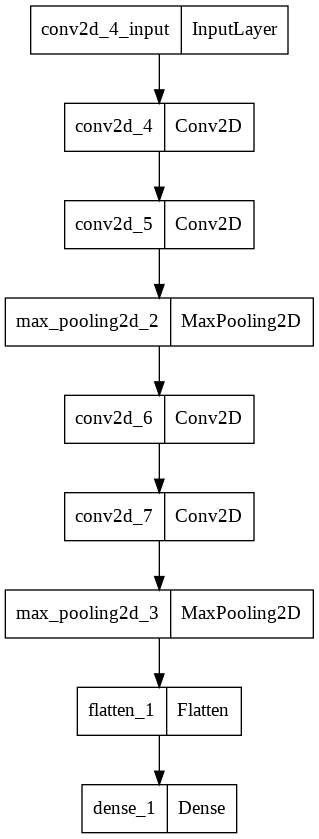

In [62]:
tf.keras.utils.plot_model(
    model_1,
    to_file='model_1.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

## Summary of What happens inside the CNN Layers

In [63]:
activation_model = tf.keras.Model(inputs=model_1.inputs, outputs=model_1.layers[0].output)
activation_model_1 = tf.keras.Model(inputs=model_1.inputs, outputs=model_1.layers[1].output)
activation_model_2 = tf.keras.Model(inputs=model_1.inputs, outputs=model_1.layers[2].output)
activation_model_3 = tf.keras.Model(inputs=model_1.inputs, outputs=model_1.layers[3].output)
activation_model_4 = tf.keras.Model(inputs=model_1.inputs, outputs=model_1.layers[4].output)
activation_model_5 = tf.keras.Model(inputs=model_1.inputs, outputs=model_1.layers[5].output)
activation_model_6 = tf.keras.Model(inputs=model_1.inputs, outputs=model_1.layers[6].output)
activation_model_7 = tf.keras.Model(inputs=model_1.inputs, outputs=model_1.layers[7].output)

--2022-12-17 09:01:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.24’

03-steak.jpeg.24    100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2022-12-17 09:01:10 (211 MB/s) - ‘03-steak.jpeg.24’ saved [1978213/1978213]



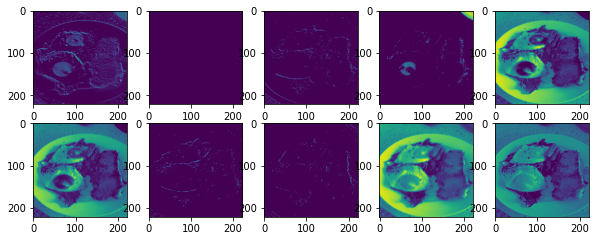

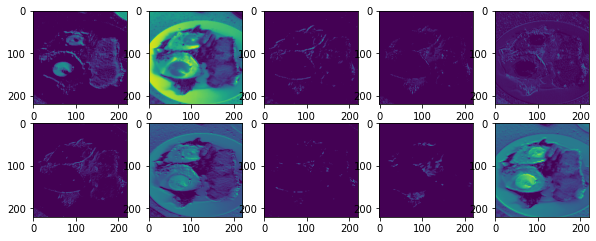

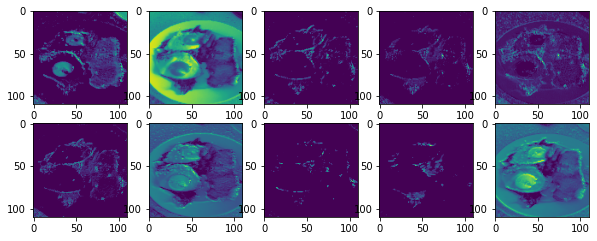

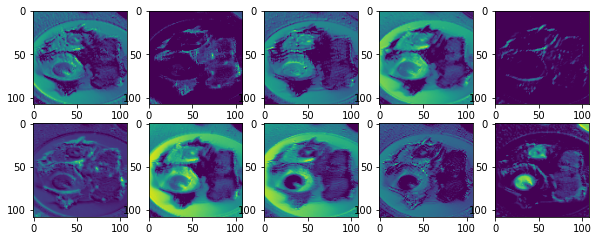

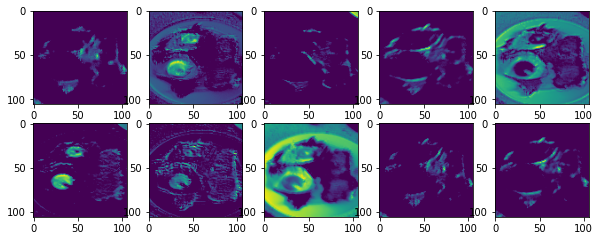

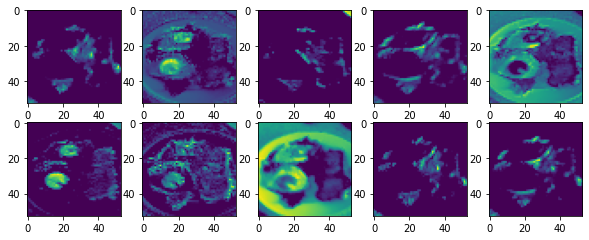

In [64]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
img_path = '/content/03-steak.jpeg'
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
img_tensor = tf.keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

activation = activation_model(img_tensor)

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(activation[0,:,:,i])
plt.show()

activation_1 = activation_model_1(img_tensor)

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(activation_1[0,:,:,i])
plt.show()

activation_2 = activation_model_2(img_tensor)

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(activation_2[0,:,:,i])
plt.show()

activation_3 = activation_model_3(img_tensor)

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(activation_3[0,:,:,i])
plt.show()

activation_4 = activation_model_4(img_tensor)

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(activation_4[0,:,:,i])
plt.show()

activation_5 = activation_model_5(img_tensor)

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(activation_5[0,:,:,i])
plt.show()

We just replicated the model shown in [CNN explainer website](https://poloclub.github.io/cnn-explainer/)?

There are a few new things we need to discuss about: 
* The [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class and the `rescale` parameter
* The [`flow_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) method
  * The `batch_size` parameter
  * The `target_size` parameter
* [`Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers (and the parameters which come with them)
* [`MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers (and their parameters).
* The `steps_per_epoch` and `validation_steps` parameters in the `fit()` function

# Getting Started with Binary classification

We just went through a whirlwind of steps:

1. Visualize the data
2. Preprocess the data or Prepare the data for the model 
3. Model Creation
4. Model Fitting
5. Model Evaluation
6. We can adjust different parameters to beat the baseline model as above. We can adjust a variety of parameters like epochs, numbe of filtes, number of layers etc
7. Repeat the process to get the best result

Let's step through each.

### 1. Import and visualize the data

Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

Image shape: (289, 512, 3)
Image shape: (341, 512, 3)


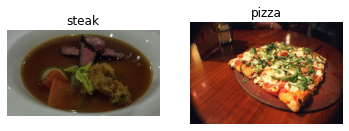

In [65]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [66]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In the next step we process our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training.

We use batches for the following reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good](https://twitter.com/ylecun/status/989610208497360896?s=20). 

An image Generator instance helps us to process our data in perfect batches. [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)


In [67]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The `ImageDataGenerator` helps in transforming our data along with batches being defined. In the above code you might have noticed that we have normalized our data by `rescaling`

You might've noticed the `rescale` parameter. This is one example of the transformations we're doing.

From these above mentioned ImageDataGenerator instances, we can load our images from their respective directories using the [`flow_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) method.

In [68]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:
* Class structure are inferred by sub directory names `train_dir` and `test_dir`.
* The `target_size` parameter defines the input size of our images in `(height, width)` format.
* The `class_mode` value of `'binary'` defines our classification problem type. If we had more than two classes, we would use `'categorical'`.
* The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

In [69]:
# Lets get the labels of the training data batch
images, labels = train_data.next() # gets the next batch
len(images), len(labels)

(32, 32)

Wonderful, it seems our images and labels are in batches of 32.

Let's see what the images look like.

In [70]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

`Rescaling` has caused the values to range from 0-1 as expected. The labels are 0 and 1 for the data as we are doing `binary classification`

In [71]:
# View the first batch of labels
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

Due to the `class_mode` parameter being `'binary'` our labels are either `0` (pizza) or `1` (steak).


### 3. Model Creation with Baseline (start with a baseline)


In [72]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [73]:
# Create the model using 3 layers of Convolutional Layers without the Max Pooling
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

```
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```

Let's discuss some of the components of the `Conv2D` layer:

* The "`2D`" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* `filters` - these are the number of "feature extractors" that will be moving over our images.
* `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3, 3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.
* `padding` - this can be either `'same'` or `'valid'`, `'same'` adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as `'valid'` (default) cuts off excess pixels where the `filter` doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these **features** are not defined by us, instead, the model learns them as it applies different filters across the image.

Now our model is ready, let's compile it.

In [74]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

Since we're working on a binary classification problem (pizza vs. steak), the `loss` function we're using is `'binary_crossentropy'`, if it was mult-iclass, we might use something like `'categorical_crossentropy'`.

Adam with all the default settings is our optimizer and our evaluation metric is accuracy.

### 4. Fit a model

Our model is compiled, time to fit it.

You'll notice two new parameters here:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [75]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [76]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 207ms/step - loss: 1.8148 - accuracy: 0.5753 - val_loss: 0.5434 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.4842 - accuracy: 0.7753 - val_loss: 0.4268 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3762 - accuracy: 0.8360 - val_loss: 0.3728 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.2705 - accuracy: 0.9027 - val_loss: 0.3824 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.1362 - accuracy: 0.9607 - val_loss: 0.4002 - val_accuracy: 0.8400


### 5. Evaluate the model

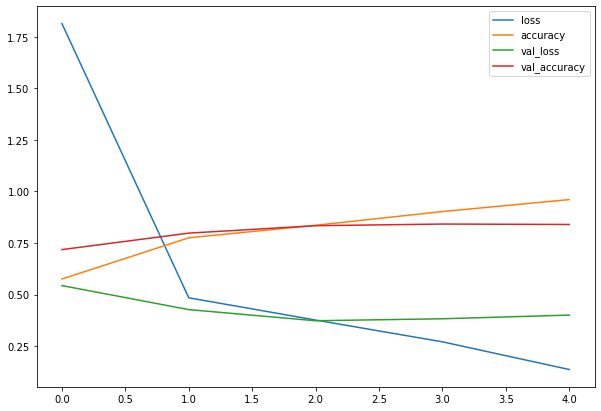

In [77]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Looking at the loss curves we can figure out that our model is **overfitting** the training dataset.

> A model is probably overfitting the training dataset if its **validation loss starts to increase**. This indicates that it is picking up on the patterns in the training dataset *too well*, which will limit its capacity to generalize to new data.

We will separate the accuracy and loss curves in order to further inspect our model.

In [78]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

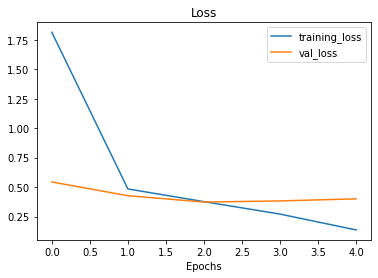

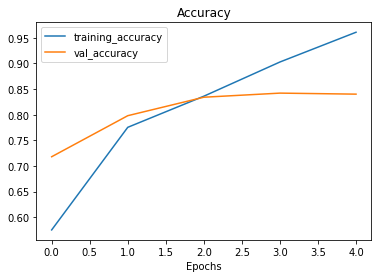

In [79]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

These two curves should ideally be in a following location. The validation curve should, if anything, be somewhat lower than the training curve. Your model is probably overfitting if the distance between the training curve and validation curve is wide.

In [80]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


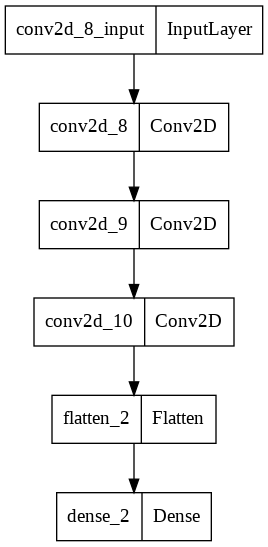

In [81]:
tf.keras.utils.plot_model(
    model_4,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

### 6. Model Parameter Adjustment

3 steps to fit any machine learning model:
0. Basline Creation.
1. Beat the baseline by overfitting.
2. Overfitting Reduction.

We have gone through step 0 and the baseline is already overfitting. We can do few other things to overfit the model such as.

* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

Why is reducing overfitting important?

If a model performs better than expected on training data but badly on real-world data, it is of little value to us.

Is it a good experience if we were constructing a pizza vs. steak food classifier app and our model performed really well on our training data but not so well when users tested it out on their own food images?

Not really...

We will build 2 more models:
* A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:

```
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```

Let's built it. It'll have the same structure as `model_4` but with a `MaxPool2D()`

In [82]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [83]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [84]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 196ms/step - loss: 0.6450 - accuracy: 0.6360 - val_loss: 0.5058 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4736 - accuracy: 0.8033 - val_loss: 0.3869 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4113 - accuracy: 0.8160 - val_loss: 0.3951 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3872 - accuracy: 0.8193 - val_loss: 0.3289 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 203ms/step - loss: 0.3568 - accuracy: 0.8487 - val_loss: 0.3531 - val_accuracy: 0.8360


Okay, it looks like our model with max pooling (`model_5`) is performing worse on the training set but better on the validation set.

Before we checkout its training curves, let's check out its architecture.

In [85]:
# Check out the model architecture
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 10)      

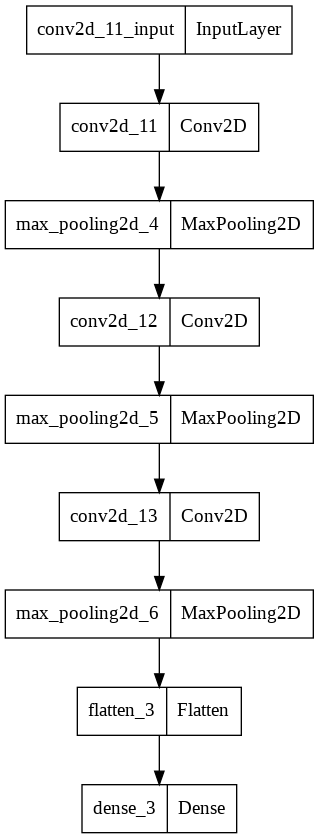

In [86]:
tf.keras.utils.plot_model(model_5)

Do you notice what's going on here with the output shape in each `MaxPooling2D` layer?

It gets halved each time. This is effectively the `MaxPooling2D` layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the `pool_size` parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in `model_5` and 477,431 in `model_4`).

Time to check out the loss curves.

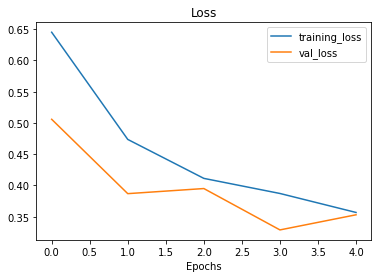

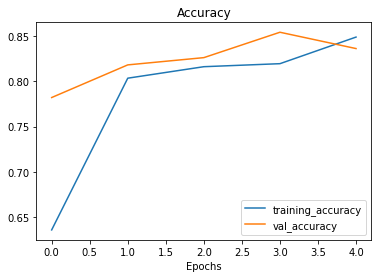

In [87]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

Nice! The training curves are much closer to one another, as can be seen. However, our validation loss appears to start growing toward the end, which might result in overfitting.

It's time to get into our toolbox and try data augmentation as yet another overfitting preventative strategy.

We'll first examine the code used to implement it before talking about what it does.

We must reinstantiate our ImageDataGenerator instances in order to implement data augmentation.

In [88]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> **What's data augmentation?**

Data augmentation is the process of changing our training data to make it more diverse so that our models can discover more broadly applicable patterns. An image may be altered by flipping, cropping, rotating, or other similar operations.

By doing this, the type of data that a model may be applied to in the actual world is simulated.

Not all of the photographs that our users take may be in settings that are comparable to our training data, if we are developing a pizza vs. steak application, for example. We have an additional method of avoiding overfitting and increasing the generalizability of our model by using data augmentation.

In [89]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Better than talk about data augmentation, how about we see it?

(remember our motto? visualize, visualize, visualize...)

In [90]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

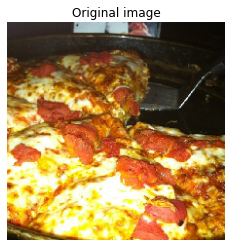

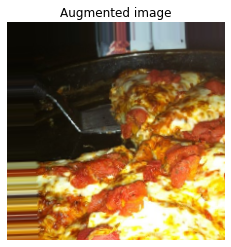

In [91]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

You can start to observe some of the example modifications on the training photos after looking through a sample of original and enhanced photographs.

A few of the enhanced photographs resemble somewhat distorted copies of the original image, as you may have seen. This implies that, as is frequently the case when utilizing real-world photographs, our model will be forced to attempt to learn patterns in less-than-perfect images.

A method to attempt and stop a model from overfitting is data augmentation. You might want to consider employing data augmentation if your model is overfitting (for instance, if the validation loss continues rising).

In [92]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 466ms/step - loss: 0.7219 - accuracy: 0.4293 - val_loss: 0.6912 - val_accuracy: 0.6200
Epoch 2/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6941 - accuracy: 0.5347 - val_loss: 0.6832 - val_accuracy: 0.5240
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6895 - accuracy: 0.5933 - val_loss: 0.6770 - val_accuracy: 0.5020
Epoch 4/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6928 - accuracy: 0.5780 - val_loss: 0.6611 - val_accuracy: 0.5380
Epoch 5/5
47/47 [==============================] - 21s 458ms/step - loss: 0.6743 - accuracy: 0.6173 - val_loss: 0.6639 - val_accuracy: 0.7480


> ⚡**Question:** Why did our model initially do poorly on the training set?

It's because we disabled data shuffle when we defined "train data augmented," which means our model only sees a batch of a single type of photos at a time.

For instance, because it is the first class, the pizza class is loaded first. As a result, rather relying on both classes, just one class is used to evaluate its performance. Because the validation data is mixed, its performance keeps getting better.

We can correct this by setting'shuffle=True' on future data generators because we just set'shuffle=False' for demonstration purposes (so we could plot the identical augmented and non-augmented picture).

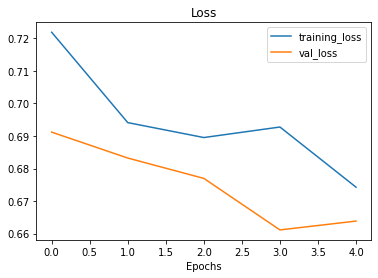

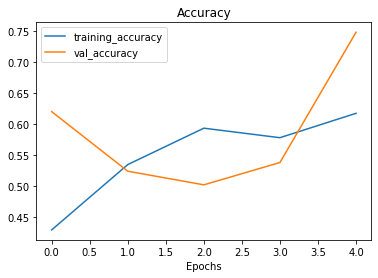

In [93]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [94]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [95]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 478ms/step - loss: 0.6699 - accuracy: 0.5907 - val_loss: 0.6022 - val_accuracy: 0.6600
Epoch 2/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5940 - accuracy: 0.6893 - val_loss: 0.4767 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 22s 459ms/step - loss: 0.5136 - accuracy: 0.7460 - val_loss: 0.3692 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 22s 463ms/step - loss: 0.4894 - accuracy: 0.7487 - val_loss: 0.3556 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 22s 463ms/step - loss: 0.4800 - accuracy: 0.7833 - val_loss: 0.4050 - val_accuracy: 0.8140


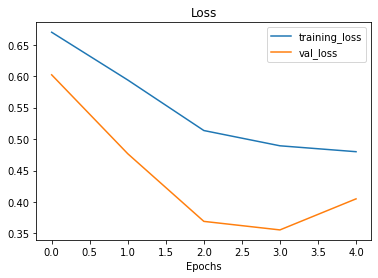

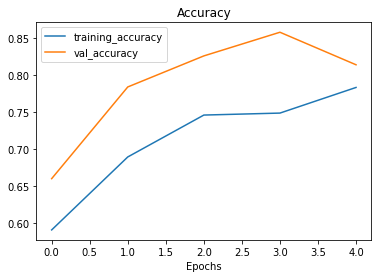

In [96]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

Notice with `model_7` how the performance on the training dataset improves almost immediately compared to `model_6`. This is because we shuffled the training data as we passed it to the model using the parameter `shuffle=True` in the `flow_from_directory` method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data (comparing `history_6` to `history_7`).

### 7. Repeat until satisified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (`model_1` or the TinyVGG architecture from [CNN explainer](https://poloclub.github.io/cnn-explainer/)).


In [97]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 473ms/step - loss: 0.6352 - accuracy: 0.6313 - val_loss: 0.6728 - val_accuracy: 0.5780
Epoch 2/5
47/47 [==============================] - 22s 472ms/step - loss: 0.5797 - accuracy: 0.6993 - val_loss: 0.4561 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 23s 487ms/step - loss: 0.5144 - accuracy: 0.7473 - val_loss: 0.4161 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 22s 465ms/step - loss: 0.5041 - accuracy: 0.7720 - val_loss: 0.3715 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 22s 467ms/step - loss: 0.4770 - accuracy: 0.7920 - val_loss: 0.3814 - val_accuracy: 0.8500


> 🔑 **Note:** You might've noticed we used some slightly different code to build `model_8` as compared to `model_1`. This is because of the imports we did before, such as `from tensorflow.keras.layers import Conv2D` reduce the amount of code we had to write. Although the code is different, the architectures are the same.

In [98]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [99]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

Now let's check out our TinyVGG model's performance.

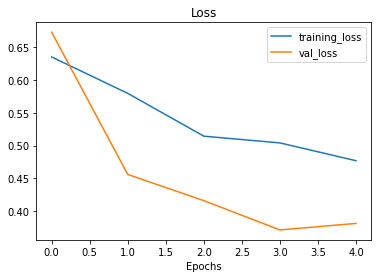

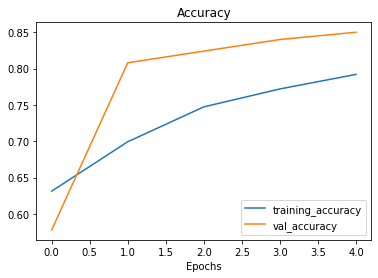

In [100]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

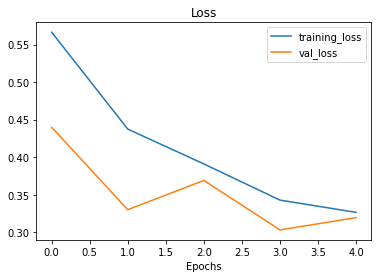

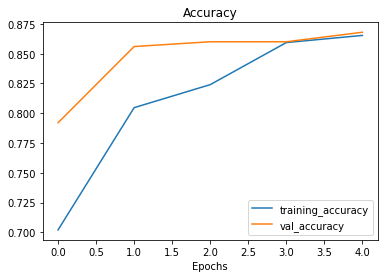

In [101]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

Hmm, our training curves are looking good, but our model's performance on the training and test sets didn't improve much compared to the previous model.

Taking another loook at the training curves, it looks like our model's performance might improve if we trained it a little longer (more epochs).

Perhaps that's something you like to try?

### Making a prediction with our trained model

Lets use some methods to predict what our models learned

In [102]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


The first test image we're going to use is [a delicious steak](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg) I cooked the other day.

--2022-12-17 09:09:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.25’

03-steak.jpeg.25    100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2022-12-17 09:09:07 (187 MB/s) - ‘03-steak.jpeg.25’ saved [1978213/1978213]



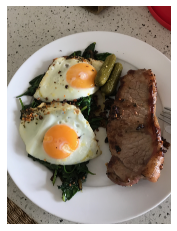

In [103]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [104]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

Since our model takes in images of shapes `(224, 224, 3)`, we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using [`tf.io.read_file`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) (for readining files) and [`tf.image`](https://www.tensorflow.org/api_docs/python/tf/image) (for resizing our image and turning it into a tensor).

> 🔑 **Note:** For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [105]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

Now we've got a function to load our custom image, let's load it in.

In [106]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

## There's one more problem...

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of `(batch_size, 224, 224, 3)`.

We can fix this by adding an extra to our custom image tensor using [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [107]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

Our custom image has a batch size of 1! Let's make a prediction on it.

In [108]:
# Make a prediction on custom image tensor
pred = model_7.predict(steak)
pred

1/1 [==============================] - 0s 136ms/step


array([[0.9093501]], dtype=float32)

Ahh, the predictions come out in **prediction probability** form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the **postive class** (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the **negative class** (class 0).

> 🔑 **Note:** The 0.5 cutoff can be adjusted to your liking. For example, you could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change your model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So let's write a little function to convert predictions into their class names and then plot the target image.

In [109]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [110]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [111]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 73ms/step


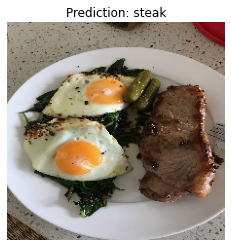

In [112]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

Nice! Our model got the prediction right.

# Multi-class Classification

All the steps will be same as above. The only changes will be noticed during prediction and output activation function i.e. in this case `softmax`

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/misc-tensorflow-workflow-outline.png)
*The workflow we're about to go through is a slightly modified version of the above image. As you keep going through deep learning problems, you'll find the workflow above is more of an outline than a step-by-step guide.* Ref: Some code and explaination are from https://github.com/mrdbourke

### 1. Dataset Import and Visualization

We will take the subset of [Food101 dataset](https://www.kaggle.com/dansbecker/food-101). Totally 8 more classes along with pizza and stake


In [113]:
import zipfile

# Download zip file with 10 classes of images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-12-17 09:09:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.112, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   261MB/s    in 1.9s    

2022-12-17 09:09:11 (261 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Walkthrough the dataset as we have done before.

In [114]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.

In [115]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

Get the various classes in the sub-directory

In [116]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Data Visualization from the training set

Image shape: (512, 512, 3)


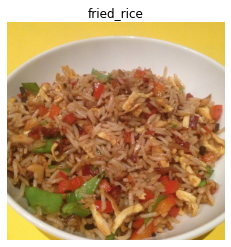

In [117]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

### 2. Preprocess the data (prepare it for a model)

We will take the normal path of pre-processing as we studied earlier
1. Normalize 
2. Distribute it into batches

In [118]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


As with binary classifcation, we've creator image generators. The main change this time is that we've changed the `class_mode` parameter to `'categorical'` because we're dealing with 10 classes of food images.

### 3. Model Creation with Baseline (start with a baseline)

There are very few changes that you might see in this network. They are as follows:-

* Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
* Changing the output layer to use `'softmax'` activation instead of `'sigmoid'` activation.
* Changing the loss function to be `'categorical_crossentropy'` instead of `'binary_crossentropy'`.

In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit a model

In [120]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 197ms/step - loss: 2.1414 - accuracy: 0.2200 - val_loss: 1.9715 - val_accuracy: 0.3004
Epoch 2/5
235/235 [==============================] - 46s 195ms/step - loss: 1.8308 - accuracy: 0.3580 - val_loss: 1.9074 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 45s 190ms/step - loss: 1.3896 - accuracy: 0.5329 - val_loss: 2.0843 - val_accuracy: 0.3088
Epoch 4/5
235/235 [==============================] - 45s 191ms/step - loss: 0.7631 - accuracy: 0.7557 - val_loss: 2.6850 - val_accuracy: 0.2892
Epoch 5/5
235/235 [==============================] - 46s 195ms/step - loss: 0.3121 - accuracy: 0.9072 - val_loss: 3.8068 - val_accuracy: 0.2736


Why do you think each epoch takes longer than when working with only two classes of images?

It's because we're now dealing with more images than we were before. We've got 10 classes with 750 training images and 250 validation images each totalling 10,000 images. Where as when we had two classes, we had 1500 training images and 500 validation images, totalling 2000.

The intuitive reasoning here is the more data you have, the longer a model will take to find patterns.

### 5. Model Evaluation

We've just trained a model on 10 different classes of food images, let's see how it went.

In [121]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 3.8068 - accuracy: 0.2736


[3.806830406188965, 0.2736000120639801]

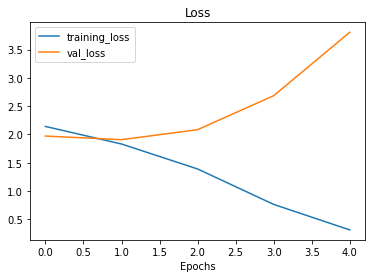

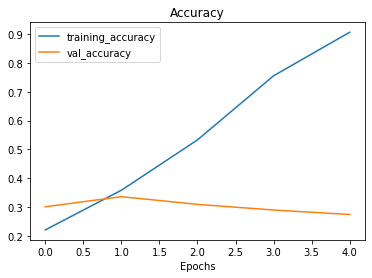

In [122]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

The loss curves tell us that the model is not **generalizing** and heavily **overfitting**

### 6. Adjust the model parameters

Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

> 🔑 **Note:** Preventing overfitting is also referred to as **regularization**.


Let's try **data augmentation**?

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

To create augmented data, we'll recreate a new [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instance, this time adding some parameters such as `rotation_range` and `horizontal_flip` to manipulate our images.

In [123]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Now we've got augmented data, let's see how it works with the same model as before (`model_10`).

Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called [`clone_model`](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model) which can take an existing model and rebuild it in the same format. 

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

> 🔑 **Note:** One of the key practices in deep learning and machine learning in general is to **be a serial experimenter**. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

In [124]:
# Clone the model (use the same architecture)
model_11 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 107s 452ms/step - loss: 2.2602 - accuracy: 0.1745 - val_loss: 2.0506 - val_accuracy: 0.2568
Epoch 2/5
235/235 [==============================] - 113s 480ms/step - loss: 2.0756 - accuracy: 0.2727 - val_loss: 2.0429 - val_accuracy: 0.2736
Epoch 3/5
235/235 [==============================] - 107s 454ms/step - loss: 2.0154 - accuracy: 0.2937 - val_loss: 1.8756 - val_accuracy: 0.3568
Epoch 4/5
235/235 [==============================] - 106s 451ms/step - loss: 1.9906 - accuracy: 0.3049 - val_loss: 1.8564 - val_accuracy: 0.3696
Epoch 5/5
235/235 [==============================] - 107s 455ms/step - loss: 1.9629 - accuracy: 0.3221 - val_loss: 1.8328 - val_accuracy: 0.3656


You can see it each epoch takes longer than the previous model. This is because our data is being augmented on the fly on the CPU as it gets loaded onto the GPU, in turn, increasing the amount of time between each epoch.

How do our model's training curves look?

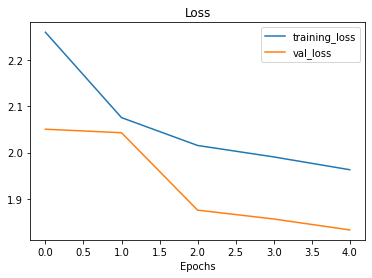

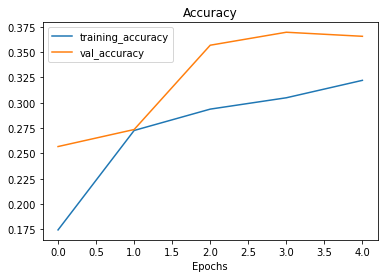

In [125]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

Woah! That's looking much better, the loss curves are much closer to eachother. Although our model didn't perform as well on the augmented training set, it performed much better on the validation dataset.

It even looks like if we kept it training for longer (more epochs) the evaluation metrics might continue to improve.

### 7. Repeat until satisfied

We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's **transfer learning**.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

## Making a prediction with our trained model

What good is a model if you can't make predictions with it?

Let's first remind ourselves of the classes our multi-class model has been trained on and then we'll download some of own custom images to work with.

In [126]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Beautiful, now let's get some of our custom images.

If you're using Google Colab, you could also upload some of your own images via the files tab.

In [127]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

Okay, we've got some custom images to try, let's use the `pred_and_plot` function to make a prediction with `model_11` on one of the images and plot it.

1/1 [==============================] - 0s 59ms/step


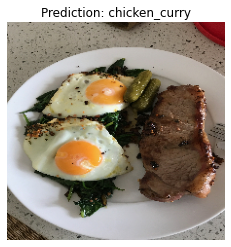

In [128]:
# Make a prediction using model_11
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

Hmm... it looks like our model got the prediction wrong, how about we try another?

1/1 [==============================] - 0s 18ms/step


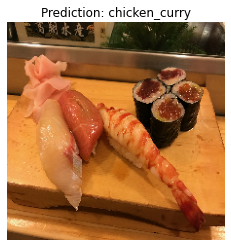

In [129]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

And again, it's predicting `chicken_curry` for some reason.

How about one more?

1/1 [==============================] - 0s 15ms/step


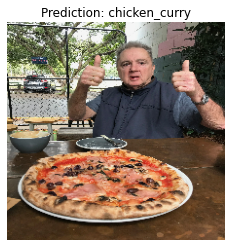

In [130]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

`chicken_curry` again? There must be something wrong...

I think it might have to do with our `pred_and_plot` function.

Let's makes a prediction without using the function and see where it might be going wrong.

1/1 [==============================] - 0s 18ms/step


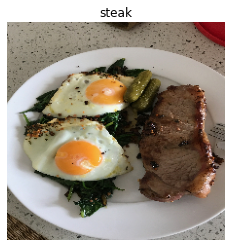

In [131]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

Much better! There must be something up with our `pred_and_plot` function.

And I think I know what it is.

The `pred_and_plot` function was designed to be used with binary classification models where as our current model is a multi-class classification model.

The main difference lies in the output of the `predict` function.

In [132]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 15ms/step


array([[0.01675847, 0.01907522, 0.0411437 , 0.29107958, 0.04902058,
        0.04424752, 0.00872562, 0.14092834, 0.36823124, 0.02078977]],
      dtype=float32)

Since our model has a `'softmax'` activation function and 10 output neurons, it outputs a prediction probability for each of the classes in our model.

The class with the highest probability is what the model believes the image contains.

We can find the maximum value index using [`argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) and then use that to index our `class_names` list to output the predicted class.

In [133]:
# Find the predicted class name
class_names[pred.argmax()]

'steak'

Knowing this, we can readjust our `pred_and_plot` function to work with multiple classes as well as binary classes.

In [134]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Let's try it out. If we've done it right, using different images should lead to different outputs (rather than `chicken_curry` every time).

1/1 [==============================] - 0s 19ms/step


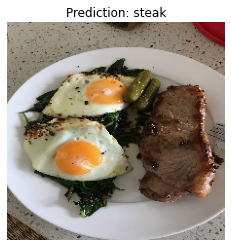

In [135]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 15ms/step


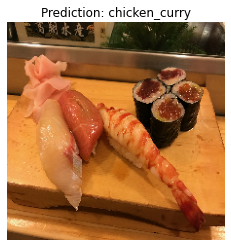

In [136]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 15ms/step


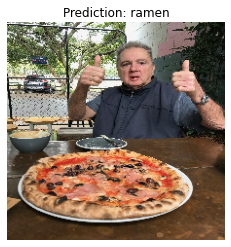

In [137]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 16ms/step


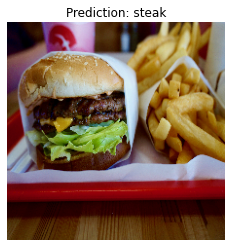

In [138]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

## Save, Load and Evaluate a model

Lets save this model in order to reload it again or use it elsewhere.

We can use the [`save`](https://www.tensorflow.org/tutorials/keras/save_and_load) and [`load_model`](https://www.tensorflow.org/tutorials/keras/save_and_load) functions.

In [139]:
# To Save a Model
model_11.save("saved_trained_model")

In [140]:
# To Load a model and Evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 1.8328 - accuracy: 0.3656


[1.8327937126159668, 0.36559998989105225]

In [141]:
# Compare the results with the unsaced moddel. Which should exactly be same.
model_11.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 1.8328 - accuracy: 0.3656


[1.832794189453125, 0.36559998989105225]